<a href="https://colab.research.google.com/github/yumnazakkiya/DQLAB_ML_AI/blob/main/SESI02/Data_Preprocessing_and_Cleaning_Handson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
import pandas as pd

# Load Dataframe

In [ ]:
df = pd.read_csv('HousingData.csv')

Menampilkan 5 baris teratas

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


# Data Duplicate

In [ ]:
df.duplicated().sum()

np.int64(0)

Tidak ada data yang duplikat, jika dilihat dari keseluruhan

In [ ]:
df.duplicated(['AGE', 'RAD']).sum()

np.int64(80)

Ada beberapa data yang duplikat jika menggunakan subset kolom tertentu. Hal ini dilakukan tergantung konteks datanya. Misalnya tidak boleh ada data duplikat pada kolom ID, atau kolom lainnya.

Kemudian, kita coba lanjutkan untuk drop baris jika ada yang duplikat

In [ ]:
df = df.drop_duplicates()

# Missing Value

In [ ]:
df.isna().sum()

,0
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


Diketahui bahwa ada beberapa kolom yang missing.

In [ ]:
df.isna().any()

,0
CRIM,True
ZN,True
INDUS,True
CHAS,True
NOX,False
RM,False
AGE,True
DIS,False
RAD,False
TAX,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Bisa melihat data missing juga dari info, bisa dilihat dari berapa nominal non-null. Jika tidak sama dengan total entry, berarti ada juga baris yang mempunyai missing value pada kolom tersebut.

## Fill Missing Value

Coba cek rataan untuk kolom yang mempunyai missing value.

In [ ]:
df['CRIM'].mean()

np.float64(3.6118739711934156)

Mencoba mengisi missing value menggunakan rataan

In [ ]:
df['CRIM'] = df['CRIM'].fillna(df['CRIM'].mean())

In [ ]:
df.isna().sum()

,0
CRIM,0
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


Saat ini tidak ada lagi missing value pada kolom yang sudah difill.

In [ ]:
df['CRIM'].mean()

np.float64(3.611873971193416)

Rataan tetap sama setelah difill

## Drop Missing Value

Kita juga bisa menghapus baris yang mengandung missing value. Nantinya total baris data akan berkurang.

In [ ]:
df.shape

(506, 14)

In [ ]:
df = df.dropna()

In [ ]:
df.shape

(506, 14)

Total baris setelah didrop menjadi 413 dari awalnya 506.

In [ ]:
df.isna().sum()

,0
CRIM,0
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


Terlihat tidak ada lagi missing value

# Rename Column

Kita akan mengubah nama kolom MEDV menjadi PRICE

In [ ]:
df = df.rename(columns={'MEDV':'PRICE'})

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


# Outlier Handling

In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.545770,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.290250,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.611874,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Jika mean jauh dari median menunjukkan bahwa data pada kolom tersebut skewed atau tidak berdistribusi normal.

Dari data ini bisa dilihat ZN memiliki nilai yang sangat besar dilihat dari 75% loncat jauh ke max.

Coba tampilkan boxplot terlebih dahulu

<Axes: ylabel='CRIM'>

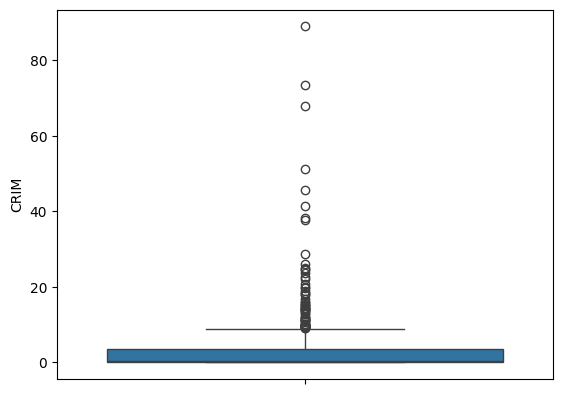

In [ ]:
import seaborn as sns

sns.boxplot(df['CRIM'])

<Axes: ylabel='ZN'>

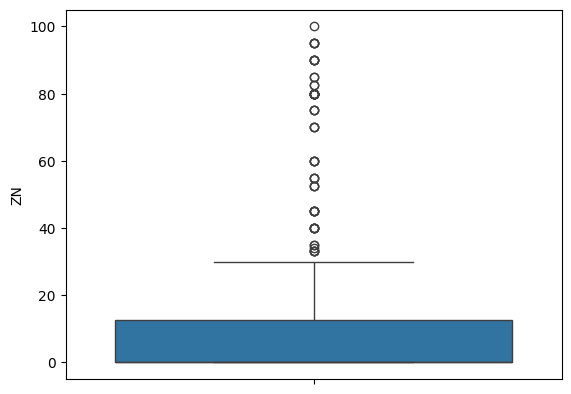

In [ ]:
import seaborn as sns

sns.boxplot(df['ZN'])

Terlihat bahwa ada beberapa titik diluar dari batas atas.

Untuk saat ini, outlier dibiarkan apa adanya.

# Data Transformation

## Min Max Scaler

In [ ]:
df['ZN'].min(), df['ZN'].max()

(0.0, 100.0)

Awalnya nilai minimum 0 dan maximum 100. Akan kita scaling menjadi 0-1 dengan menggunakan MinMaxScaler. Hal ini dilakukan jika model yang akan kita gunakan nantinya membutuhkan dataset dengan rentang yang sama.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

df['ZN'] = MinMaxScaler().fit_transform(df['ZN'].values.reshape(len(df), 1))

In [ ]:
df['ZN'].min(), df['ZN'].max()

(0.0, 1.0)

Terlihat bahwa nilai min dan max berada dalam rentang 0 dan 1.

## Log Transformation

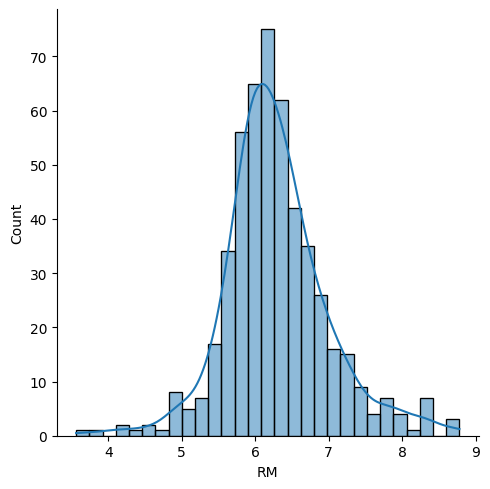

In [ ]:
sns.displot(df['RM'], kde='hist')

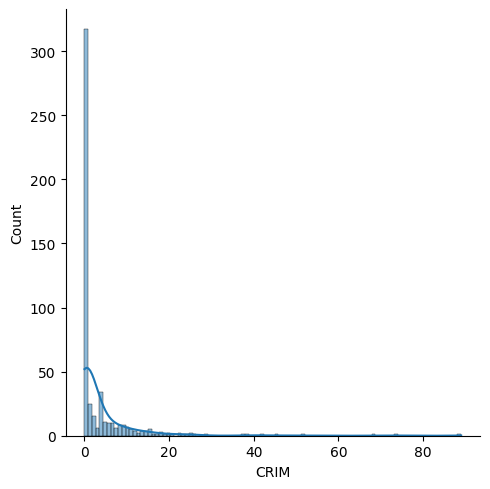

In [ ]:
sns.displot(df['CRIM'], kde='hist')

Grafik diatas memiliki distribusi Normal

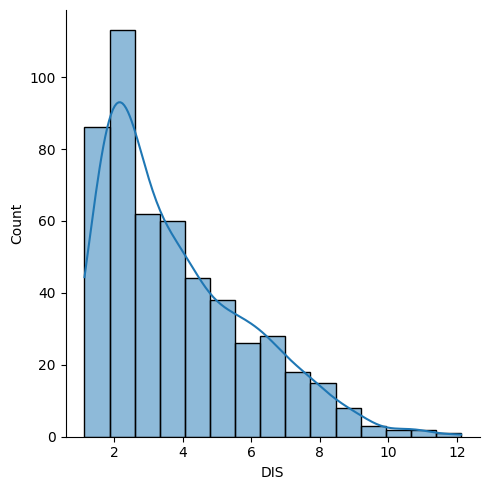

In [ ]:
sns.displot(df['DIS'], kde='hist')

Grafik di atas terlihat skewed dan tidak memiliki distribusi normal. Kita akan melakukan log transformasi pada kolom tersebut untuk membuatnya menjadi distribusi normal.

In [ ]:
import numpy as np

df['DIS'] = np.log(df['DIS'])

In [ ]:
df['new_crim']=np.log(df['CRIM'])

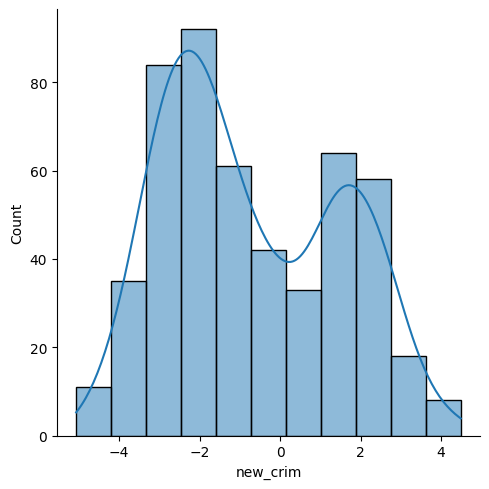

In [ ]:
sns.displot(df['new_crim'], kde='hist')

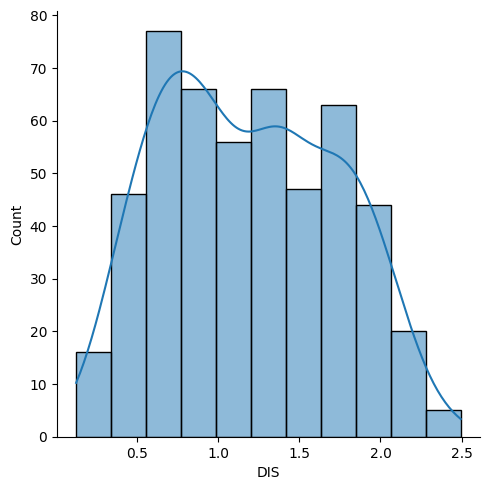

In [ ]:
sns.displot(df['DIS'], kde='hist')

Terlihat data pada kolom tersebut mendekati distribusi normal. Transformasi ini dilakukan jika model yang akan gunakan nantinya membutuhkan distribusi normal.

Keputusan untuk mengubah skala atau distribusi data harus didasarkan pada pemahaman yang baik tentang algoritma yang digunakan dan karakteristik data. Dalam beberapa kasus, eksperimen dapat membantu untuk menentukan apakah transformasi tersebut diperlukan atau tidak.